In [1]:
%matplotlib inline

import numpy as np
import argparse
import glob
import cv2
from matplotlib import pyplot as plt

In [2]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
	# return the edged image
	return edged

In [13]:
#from IPython.display import Image

# get the image
#hand1 = Image(url="img/hand1.jpg", width=300, height=300)

In [4]:
image = cv2.imread("img/hand1.png")

# show the images


In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
wide = cv2.Canny(blurred, 10, 200)
tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred, sigma=0.9)

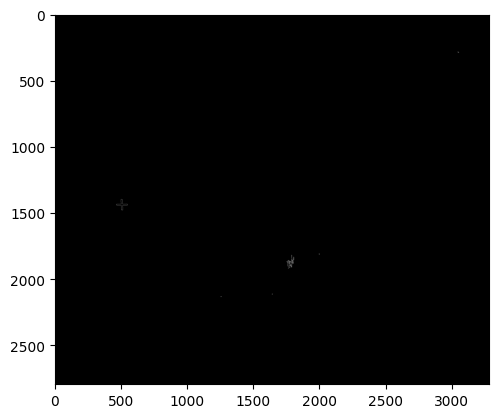

In [6]:
plt.imshow(auto, cmap="gray")
plt.show()

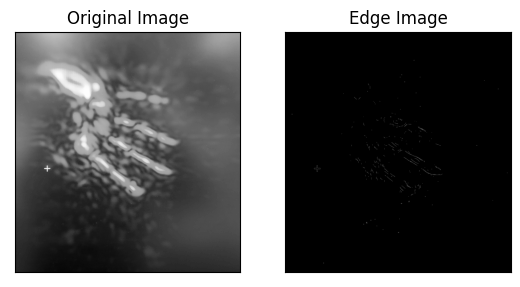

In [10]:
img = cv2.imread('img/hand2.jpg',0)
high_thresh, thresh_im = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lowThresh = 0.5*high_thresh
edges = cv2.Canny(img,lowThresh,high_thresh)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
def callback(x):
    print(x)

    cv2.startWindowThread()

img = cv2.imread('img/hand2.jpg', 0) #read image as grayscale


canny = cv2.Canny(img, 85, 255) 
cv2.namedWindow('image') # make a window with name 'image'
cv2.createTrackbar('L', 'image', 0, 255, callback) #lower threshold trackbar for window 'image
cv2.createTrackbar('U', 'image', 0, 255, callback) #upper threshold trackbar for window 'image

while(1):
    numpy_horizontal_concat = np.concatenate((img, canny), axis=1) # to display image side by side
    cv2.imshow('image', numpy_horizontal_concat)
    k = cv2.waitKey(1) & 0xFF
    if k == 27: #escape key
        break
    l = cv2.getTrackbarPos('L', 'image')
    u = cv2.getTrackbarPos('U', 'image')

    canny = cv2.Canny(img, l, u)

cv2.destroyAllWindows()

In [3]:
#hough line transform
import cv2 as cv
import math
import sys
src = cv.imread("img/hand2.jpg", cv.IMREAD_GRAYSCALE)
dst = cv.Canny(src, 72, 115)
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)
lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

In [4]:
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)


In [ ]:
linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)


cv.imwrite("probabilistichoughlinetransformation.png", cdstP)
cv.imshow("Source", src)
cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)

cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)

cv.waitKey()

In [ ]:
ret, thresh = cv2.threshold(cv2.imread("img/image_thres1 copy.png", cv2.IMREAD_GRAYSCALE), 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
cv2.imshow('Binary image', thresh)
cv2.waitKey(0)
cv2.imwrite('image_thres1.jpg', thresh)
cv2.destroyAllWindows()

In [ ]:
import cv2 as cv
import random as rng
img = cv.imread("img/image_thres1 copy.png", 0)
canny_output = auto_canny(img)
    # Find contours
contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# Find the convex hull object for each contour
hull_list = []
for i in range(len(contours)):
    hull = cv.convexHull(contours[i])
    hull_list.append(hull)
# Draw contours + hull results
drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(drawing, contours, i, color)
    cv.drawContours(drawing, hull_list, i, color)
# Show in a window
cv.imshow('Contours', drawing)
cv.imwrite("Contours.png", drawing)
cv2.waitKey(0)


In [ ]:
img = cv.imread('img/hand2.jpg')
dst = cv.fastNlMeansDenoisingColored(img,None,10,10,9,22)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

In [11]:
im_gray = cv2.imread("img/hand2.jpg",  cv2.IMREAD_GRAYSCALE)
image = cv2.GaussianBlur(im_gray, (5,5), 1)
th =  cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,2)

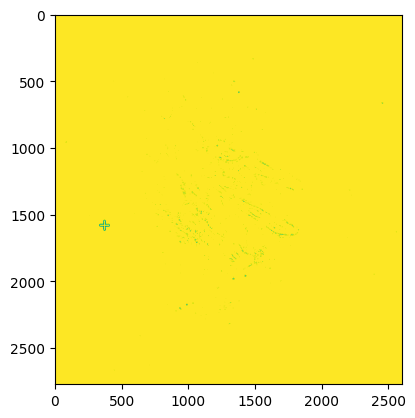

In [12]:
plt.imshow(th)
plt.show()

In [13]:
image = cv2.imread('img/hand2.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
out_gray=cv2.divide(image, bg, scale=255)
out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] 

cv2.imshow('binary', out_binary)  
cv2.imwrite('binary.png',out_binary)

cv2.imshow('gray', out_gray)  
cv2.imwrite('gray.png',out_gray)

True

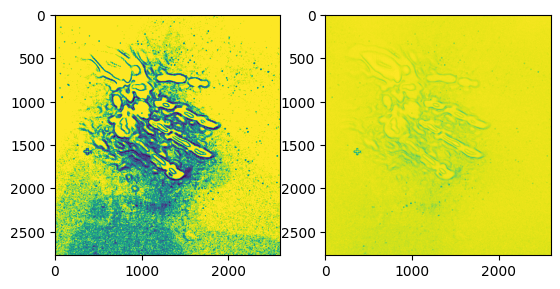

In [14]:
plt.subplot(121),plt.imshow(out_binary)
plt.subplot(122),plt.imshow(out_gray)
plt.show()

In [3]:
img = cv2.imread("img/hand2.jpg")

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blur
blur = cv2.GaussianBlur(gray, (0,0), sigmaX=33, sigmaY=33)

# divide
divide = cv2.divide(gray, blur, scale=255)

# otsu threshold
thresh = cv2.threshold(divide, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# write result to disk
cv2.imwrite("hebrew_text_division.jpg", divide)
cv2.imwrite("hebrew_text_division_threshold.jpg", thresh)
cv2.imwrite("hebrew_text_division_morph.jpg", morph)

# display it
cv2.imshow("gray", gray)
cv2.imshow("divide", divide)
cv2.imshow("thresh", thresh)
cv2.imshow("morph", morph)
cv2.waitKey(0)
cv2.destroyAllWindows()

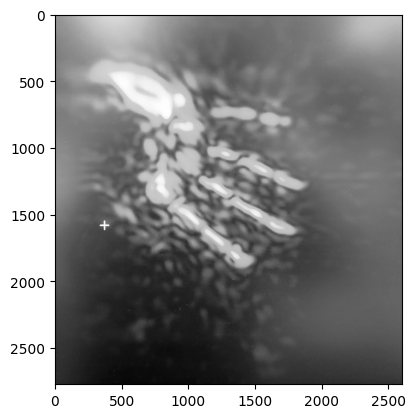

In [3]:
img = cv2.imread("img/hand2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,2))
morphology_img = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel,iterations=1)
plt.imshow(morphology_img,'Greys_r')

In [4]:
img = cv2.imread('img/hand2.jpg')  # Read input image

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to Grayscale.

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)  # Convert to binary and invert polarity

# Use "close" morphological operation to close small gaps
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.array([1, 1]));
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.array([1, 1]).T);

nlabel,labels,stats,centroids = cv2.connectedComponentsWithStats(thresh, connectivity=8)

thresh_size = 100

# Delete all lines by filling wide and long lines with zeros.
# Delete very small clusters (assumes to be noise).
for i in range(1, nlabel):
    #
    if (stats[i, cv2.CC_STAT_WIDTH] > thresh_size) or (stats[i, cv2.CC_STAT_HEIGHT] > thresh_size):
        thresh[labels == i] = 0
    if stats[i, cv2.CC_STAT_AREA] < 4:
        thresh[labels == i] = 0

# Clean left and top margins "manually":
thresh[:, 0:30] = 0
thresh[0:10, :] = 0

# Inverse polarity
thresh = 255 - thresh

# Write result to file
cv2.imwrite('threshxx.png', thresh)

True

In [4]:
img = cv2.imread('img/hand2.jpg')  # Read input image
out = cv2.resize(img, (640,853))

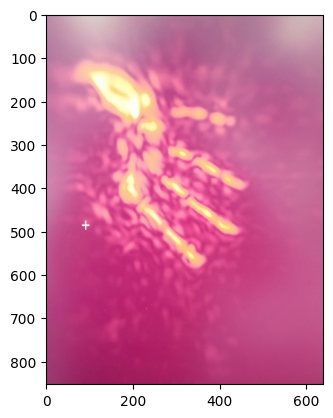

In [5]:
plt.imshow(out)
plt.show()

In [ ]:
ret, thresh = cv2.threshold(cv2.imread("img/microwave/1.png", cv2.IMREAD_GRAYSCALE), 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
cv2.imshow('Binary image', thresh)
cv2.waitKey(0)
cv2.imwrite('image_thres1.jpg', thresh)
cv2.destroyAllWindows()

In [3]:
x = cv2.imread("img/microwave/1.png", cv2.IMREAD_GRAYSCALE)

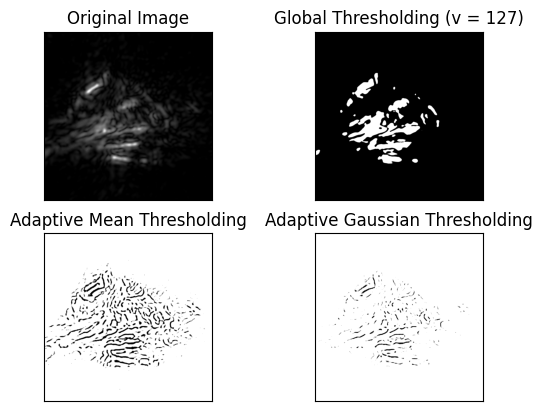

In [44]:
img = cv2.imread('img/microwave/22.png',0)
#img = cv2.medianBlur(img,5)
img = cv2.GaussianBlur(img, (7, 7), 0)


ret,th1 = cv2.threshold(img,70,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

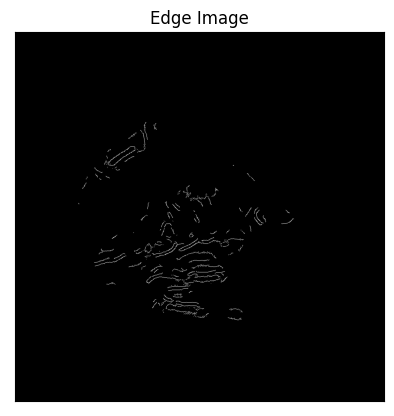

In [40]:
edges = cv2.Canny(img,10,40)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [41]:
dst = cv2.normalize(img[:,:,1], dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [42]:
img[th==255]=(255,255,0)

NameError: name 'th' is not defined

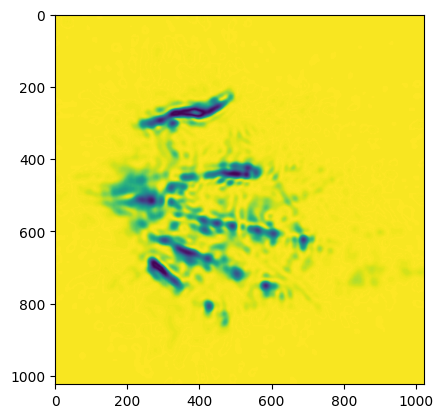

In [78]:
lab = cv2.cvtColor(cv2.imread('img/microwave/50.png'), cv2.COLOR_BGR2LAB)

# A-channel
plt.imshow(lab[:,:,1])
plt.show()

In [79]:
th = cv2.threshold(lab[:,:,1],127,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

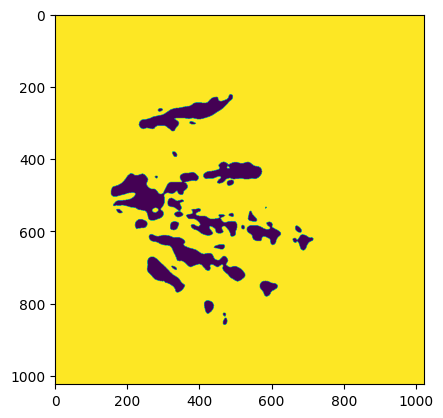

In [80]:
plt.imshow(th)
plt.show()